In [1]:
import json
import sklearn.metrics as skm
from matplotlib import pyplot as plt
import numpy as np

#list_metrics_all = ['mae', 'rmse', 'pearson', 'spearman', 'kendalltau', 'r2_score']
list_metrics = ['pearson', 'spearman', 'kendalltau', 'r2_score']
#
#list_metrics = ['mae', 'rmse', 'pearson', 'r2_score']
list_predictor = ['xgb'] #['mlp', 'xgb', 'gp_path', 'bananas']
list_seeds = [1] #[1,2,3,4,5]
list_dataset_name = ['so2sat_lcz42_micro', 'so2sat_lcz42_latency', 'so2sat_lcz42_MACs']


In [2]:
dict_per_dataset = dict()

for dataset_name in list_dataset_name:
    dict_per_predictor = dict()

    for predictor_i in list_predictor:

        dict_per_seed = dict()

        for seed_i in list_seeds:

            file_name = '{}/predictors/{}/{}/errors.json'.format(dataset_name, predictor_i, seed_i)

            with open(file_name, 'r') as json_results:
                file_gp_lcz42 = json.loads(json_results.read())   

            config_exps = file_gp_lcz42[0]
            training_size = None

            if config_exps['experiment_type'] == 'vary_train_size':
                training_size = config_exps['train_size_list']
            elif config_exps['experiment_type'] == 'single':
                training_size =  config_exps['train_size_single']
            else:
                pass

            #print('seed:', dict_all_sizes)

            if not file_gp_lcz42[0]['experiment_type'] == 'single':


                number_of_items = len(training_size)

                dict_all_sizes = dict()
                for idx_i, size_i in enumerate(training_size):

                    r2_score = skm.r2_score(file_gp_lcz42[idx_i + 1]['full_ytest'], 
                                            file_gp_lcz42[idx_i + 1]["full_testpred"])

                    performance = dict()            
                    for metric_k in list_metrics:
                        if metric_k == 'r2_score':
                            performance[metric_k] = performance.get(metric_k, []) + [r2_score]
                        else:
                            value_k = file_gp_lcz42[idx_i + 1][metric_k]
                            performance[metric_k] = performance.get(metric_k, []) + [value_k]

                    dict_all_sizes[size_i] = performance
            dict_per_seed[seed_i] = dict_all_sizes

        dict_per_predictor[predictor_i] = dict_per_seed
        
    dict_per_dataset[dataset_name] = dict_per_predictor

In [3]:
dict_per_dataset

{'so2sat_lcz42_micro': {'xgb': {1: {200: {'pearson': [0.6181720451605558],
     'spearman': [0.506995682382134],
     'kendalltau': [0.3729500586759772],
     'r2_score': [0.2758220281389834]},
    300: {'pearson': [0.7520973295880866],
     'spearman': [0.6767763753566897],
     'kendalltau': [0.5073902535515737],
     'r2_score': [0.5325027366627799]},
    400: {'pearson': [0.8000663447922309],
     'spearman': [0.7150628457786347],
     'kendalltau': [0.5612473195710145],
     'r2_score': [0.6264708420869765]},
    500: {'pearson': [0.7779894993234193],
     'spearman': [0.7154889177848976],
     'kendalltau': [0.5689411861452204],
     'r2_score': [0.5887781566979782]},
    750: {'pearson': [0.855840845710774],
     'spearman': [0.8343690085464539],
     'kendalltau': [0.6964973951386327],
     'r2_score': [0.728163660408393]},
    800: {'pearson': [0.8526735976062538],
     'spearman': [0.8270477712557371],
     'kendalltau': [0.6952825741006003],
     'r2_score': [0.7224715990153

In [4]:
#dict_per_predictor = dict()
for dataset_name_i in list_dataset_name:

    for predictor_i in list_predictor:    
        for seed_i in list_seeds:
            dict_all_sizes = dict()
            for idx_i, size_i in enumerate(training_size):
                for metric_k in list_metrics:
                    if dict_per_dataset[dataset_name_i][predictor_i].get(seed_i - 1, None) is None:
                        previous_value = []
                    else:
                        #print(dict_per_predictor[predictor_i][seed_i - 1], metric_k)
                        previous_value = dict_per_dataset[dataset_name_i][predictor_i][seed_i - 1][size_i][metric_k]
                    dict_per_dataset[dataset_name_i][predictor_i][seed_i][size_i][metric_k] += previous_value

In [5]:
dict_per_dataset

{'so2sat_lcz42_micro': {'xgb': {1: {200: {'pearson': [0.6181720451605558],
     'spearman': [0.506995682382134],
     'kendalltau': [0.3729500586759772],
     'r2_score': [0.2758220281389834]},
    300: {'pearson': [0.7520973295880866],
     'spearman': [0.6767763753566897],
     'kendalltau': [0.5073902535515737],
     'r2_score': [0.5325027366627799]},
    400: {'pearson': [0.8000663447922309],
     'spearman': [0.7150628457786347],
     'kendalltau': [0.5612473195710145],
     'r2_score': [0.6264708420869765]},
    500: {'pearson': [0.7779894993234193],
     'spearman': [0.7154889177848976],
     'kendalltau': [0.5689411861452204],
     'r2_score': [0.5887781566979782]},
    750: {'pearson': [0.855840845710774],
     'spearman': [0.8343690085464539],
     'kendalltau': [0.6964973951386327],
     'r2_score': [0.728163660408393]},
    800: {'pearson': [0.8526735976062538],
     'spearman': [0.8270477712557371],
     'kendalltau': [0.6952825741006003],
     'r2_score': [0.7224715990153

In [6]:
for dataset_name_i in list_dataset_name:
    # Retrieve the latest seed value as the final dict
    for predictor_i in list_predictor:    
        dict_per_dataset[dataset_name_i][predictor_i] = dict_per_dataset[dataset_name_i][predictor_i][list_seeds[-1::][0]]

In [7]:
def box_plot(data, edge_color, fill_color):
    
    flierprops = dict(marker='o', markerfacecolor=edge_color, markersize=2,
                  linestyle='none')
    
    bp = ax.boxplot(data, patch_artist=True, flierprops=flierprops)
    
    for element in ['boxes', 'whiskers', 'fliers', 'means', 'medians', 'caps']:
        plt.setp(bp[element], color=edge_color)

    for patch in bp['boxes']:
        patch.set(facecolor=fill_color)       
        
    return bp

dict_color_metrics = {'mae': 'blue', 'rmse': 'red', 
                      'pearson':'green', 'spearman':'purple', 
                      'kendalltau':'grey', 'r2_score':'black'}

In [8]:
labels_axis = list()
for _ in range(len(list_metrics)):
    labels_axis += training_size

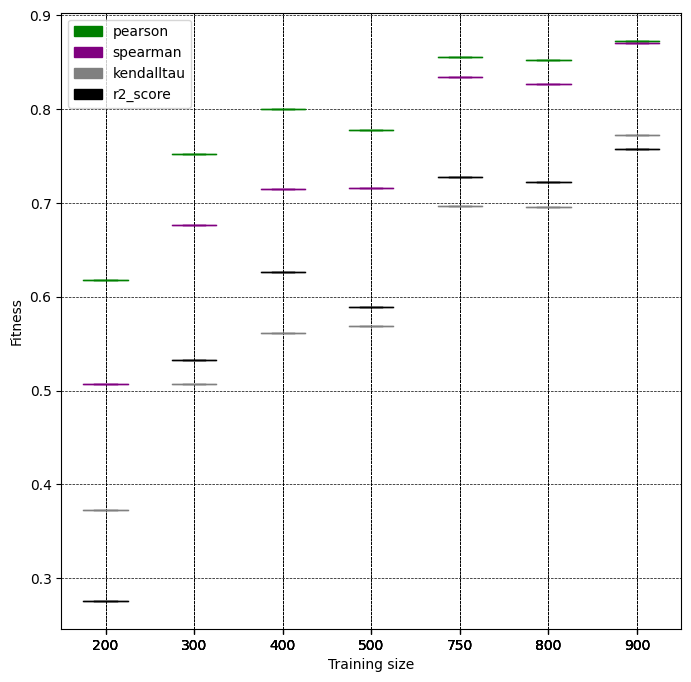

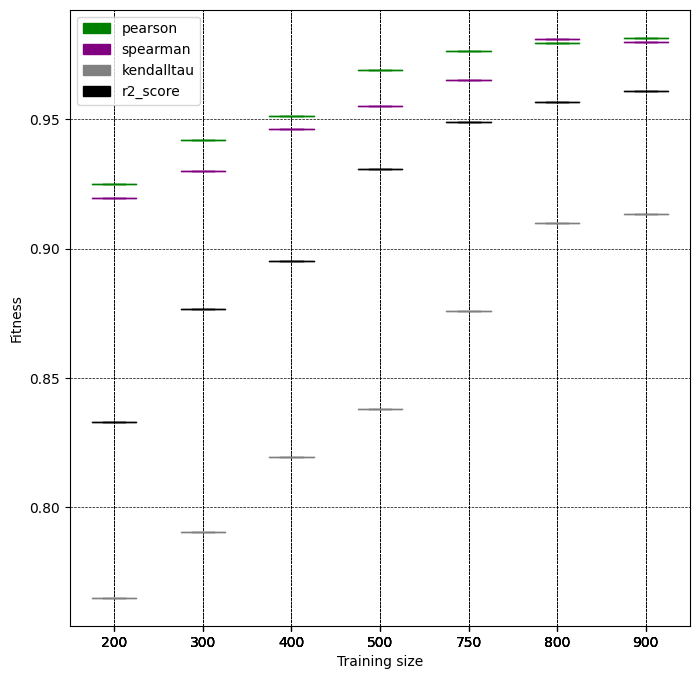

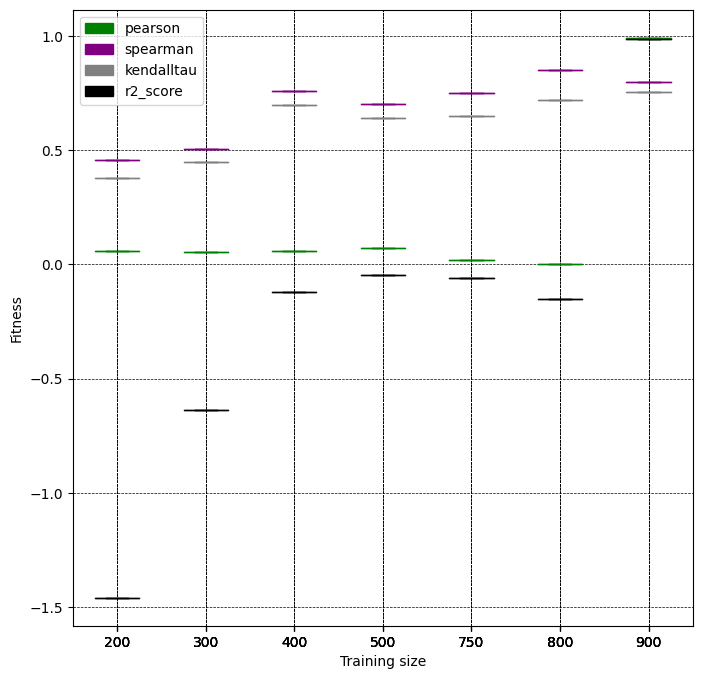

In [9]:
for dataset_name_i in list_dataset_name:
    for predictor_i in list_predictor:
        fig, ax = plt.subplots(figsize=(8, 8))
        #fig.set_figwidth(8)
        #plt.title('Fitness of surrogate as function of training size - ' + predictor_i.upper() 
        #      + '\n No learning curve prediction - Test size = 100')    
        #plt.title(dataset_name_i.upper() + ' - ' + predictor_i.upper() 
        #      + '\n No learning curve prediction - Test size = 100')    

        plt.xlabel('Training size')
        plt.ylabel('Fitness')
        list_box_plots = list()

        for metric_i in list_metrics:

            plt.grid(color = 'black', linestyle = '--', linewidth = 0.5)

            data_i = [dict_per_dataset[dataset_name_i][predictor_i][t_i][metric_i] for t_i in training_size]

            bp_i = box_plot(data_i, edge_color=dict_color_metrics[metric_i], 
                            fill_color=dict_color_metrics[metric_i]) 
                            #fill_color='white')
            list_box_plots.append(bp_i)

        ax.legend([bp_i["boxes"][0]for bp_i in list_box_plots], [m_k.lower() for m_k in list_metrics])
        ax.set_xticklabels(labels_axis)    
        plt.savefig(dataset_name_i + '_vary_training_size_' +  predictor_i + '_1_seeds_' + '.png')
        #plt.ylim((-0.1, 5))
    #plt.legend(loc='upper right')